# Analyzing Borrower Default Risk

Your task is to prepare a report for the credit division of a bank. You will investigate the influence of a customer's marital status and the number of children they have on the probability of defaulting on loan repayment. The bank already has some data on the creditworthiness of its customers.

Your report will be considered when making credit assessments for prospective customers. Credit assessments are used to evaluate the ability of potential borrowers to repay their loans.

<font color='blue'>**Objectives**</font>

<font color='blue'>
The objective of this project is to determine the influence of marital status and the number of children on the probability of defaulting on loan repayment. This will assist the bank's credit division in making more accurate decisions when assessing the creditworthiness of customers.<b></b>
    
Testing three hypotheses:    
1. The number of children a customer has significantly affects the probability of defaulting on loan repayment.
2. Marital status significantly influences the probability of defaulting on loan repayment.
3. Income level significantly affects the probability of defaulting on loan repayment.
4. The purpose of the loan significantly influences the probability of defaulting on loan repayment.   
</font>

## Open the data file and read its general information.

In [31]:
# Import all libraries
import pandas as pd

# Load the data
try:
    df = pd.read_csv('datasets/credit_scoring_eng.csv')
except:
    df = pd.read_csv('/Documents/Practicum/Projects/datasets/credit_scoring_eng.csv') 

## Stage 1. Data Exploration

**Data Description**
- `children` - number of children in the family
- `days_employed` - customer's work experience in days
- `dob_years` - customer's age in years
- `education` - customer's education level
- `education_id` - identifier for the customer's education level
- `family_status` - identifier for the customer's marital status
- `family_status_id` - identifier for marital status
- `gender` - customer's gender
- `income_type` - type of employment
- `debt` - whether the customer has ever defaulted on a loan
- `total_income` - monthly income
- `purpose` - purpose of obtaining a loan

In [32]:
# Rows and columns our dataset has
df.shape

(21525, 12)

In [33]:
# Display the first N rows
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


<font color='blue'>**From the displayed data, there are a few things to note:**</font>
<font color='blue'>
- The 'days_employed' column has negative values.
- The 'education' column has string values in uppercase.
- There may be missing values and duplicates in each column.
</font>

In [34]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<font color='blue'>There are missing values in the 'days_employed' and 'total_income' columns. The other columns have the same number of rows as the total entries.</font>

In [35]:
# Examine the filtered table with missing values in the first column that contains the missing data
df[df['days_employed'].isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


<font color='blue'>
It appears that the number of missing values in the 'days_employed' and 'total_income' columns is the same. However, it cannot be assumed that the missing values are symmetrical. We still need to check for patterns and other causes of missing values.
</font>

In [36]:
# Apply some conditions to filter the data and see the number of rows in the filtered table
df[['days_employed','total_income']].isnull().sum()

days_employed    2174
total_income     2174
dtype: int64

**Preliminary Conclusion**

<font color='blue'>The number of missing values in the 'days_employed' and 'total_income' columns is both 2174. This indicates that each row with missing values in both columns has missing values in both columns, and we can assume that the missing values are not randomly distributed throughout the dataset. The missing data accounts for 10.1% of the total. We need to replace the missing values to better analyze the data.</font>

In [37]:
# Let's examine customers who have missing data in identified characteristic columns and columns with missing values
print(df[df['days_employed'].isnull()]['children'].unique())
print(df[df['days_employed'].isnull()]['dob_years'].unique())
print(df[df['days_employed'].isnull()]['education'].unique())
print(df[df['days_employed'].isnull()]['education_id'].unique())
print(df[df['days_employed'].isnull()]['family_status'].unique())
print(df[df['days_employed'].isnull()]['family_status_id'].unique())
print(df[df['days_employed'].isnull()]['gender'].unique())
print(df[df['days_employed'].isnull()]['income_type'].unique())
print(df[df['days_employed'].isnull()]['debt'].unique())
print(df[df['days_employed'].isnull()]['total_income'].unique())
print(df[df['days_employed'].isnull()]['purpose'].unique())

[ 0  1  2 -1  3  4 20  5]
[65 41 63 50 54 21 52 32 35 34 44 47 46 29 27 39 62 55 26 30 31 23 58 60
 40 66 33 56 69 59 57 45 53 48 51 37 43 24 28 67 64 25 49 42 61 36 70 38
 20  0 68 19 22 71 72 73]
['secondary education' "bachelor's degree" 'SECONDARY EDUCATION'
 'some college' 'Secondary Education' 'Some College' "Bachelor's Degree"
 'SOME COLLEGE' 'primary education' "BACHELOR'S DEGREE"
 'Primary Education' 'PRIMARY EDUCATION']
[1 0 2 3]
['civil partnership' 'married' 'unmarried' 'widow / widower' 'divorced']
[1 0 4 2 3]
['M' 'F']
['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']
[0 1]
[nan]
['to have a wedding' 'education' 'building a real estate'
 'second-hand car purchase' 'transactions with commercial real estate'
 'purchase of the house for my family' 'housing' 'housing transactions'
 'having a wedding' 'buy residential real estate' 'profile education'
 'university education' 'car' 'wedding ceremony' 'building a property'
 'to own a car' 'buying a second-hand car'

In [38]:
# Check the distribution
print('children')
print(df['children'].value_counts())
print()

print('days_employed')
print(df['days_employed'].value_counts())
print()

print('dob_years')
print(df['dob_years'].value_counts())
print()

print('education')
print(df['education'].value_counts())
print()

print('education_id')
print(df['education_id'].value_counts())
print()

print('family_status')
print(df['family_status'].value_counts())
print()

print('family_status_id')
print(df['family_status_id'].value_counts())
print()

print('gender')
print(df['gender'].value_counts())
print()

print('income_type')
print(df['income_type'].value_counts())
print()

print('debt')
print(df['debt'].value_counts())
print()

print('purpose')
print(df['purpose'].value_counts())
print()

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

days_employed
-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74 

**Possible causes of missing values in the data.**

<font color='blue'>
From the results, there is no clear pattern in the missing/random data.
</font>

In [39]:
# Check the distribution across the entire dataset

print('children')
print(df['children'].describe())
print()

print('days_employed')
print(df['days_employed'].describe())
print()

print('dob_years')
print(df['dob_years'].describe())
print()

print('education')
print(df['education'].describe())
print()

print('education_id')
print(df['education_id'].describe())
print()

print('family_status')
print(df['family_status'].describe())
print()

print('family_status_id')
print(df['family_status_id'].describe())
print()

print('gender')
print(df['gender'].describe())
print()

print('income_type')
print(df['income_type'].describe())
print()

print('debt')
print(df['debt'].describe())
print()

print('purpose')
print(df['purpose'].describe())
print()

children
count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

days_employed
count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

dob_years
count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

education
count                   21525
unique                     15
top       secondary education
freq                    13750
Name: education, dtype: object

education_id
count    21525.000000
mean         0.817236
std          0.548138
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000


**Conclusion**

<font color='blue'>
In this dataset, there may be some patterns causing the missing values. However, with the available data, it is difficult to determine the exact causes of the missing values.
</font>

<font color='blue'>
We will fill in the missing values in the 'days_employed' and 'total_income' columns with appropriate statistical values.
</font>

## Data Transformation

In [40]:
# Examine all values in the education column to check for any spelling corrections needed.
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [41]:
# Fix the records
df['education'] = df['education'].str.lower()

In [42]:
# Check all values in the column to ensure that we have fixed them correctly
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [43]:
# Check the distribution of values in the 'children' column
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

<font color='blue'>
There are negative values (-1) and very high values (20). Most likely, the value -1 is an input error and should be replaced with 1, while the value 20 is an input error and should be replaced with the value 2.
</font>

In [44]:
# Fix the data
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2

In [45]:
# Recheck the 'children' column to ensure that everything has been fixed
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [46]:
# Identify problematic data in the 'days_employed' column if there are any issues, and calculate the percentage
negative_data=df[df['days_employed']<0]['days_employed'].count()
print(negative_data)

percentage_negative_data=negative_data/len(df['days_employed'])*100
print(f"{percentage_negative_data:.0f}%")

15906
74%


In [47]:
# Address the problematic values
df.loc[df['days_employed'] <0, 'days_employed'] *= -1


In [48]:
# Check the results - ensure that the problem has been fixed
df[df['days_employed']<0]['days_employed'].count()

0

In [49]:
df['days_employed']=df['days_employed'] / 365
df['days_employed']

0         23.116912
1         11.026860
2         15.406637
3         11.300677
4        932.235814
            ...    
21520     12.409087
21521    942.294258
21522      5.789991
21523      8.527347
21524      5.437007
Name: days_employed, Length: 21525, dtype: float64

In [50]:
df_upd_it=df[(df['income_type'] != 'retiree') & (df['income_type'] != 'unemployed')]
df_upd_it['days_employed'].describe()

count    15906.000000
mean         6.446619
std          6.312997
min          0.066141
25%          2.072252
50%          4.465807
75%          8.650630
max         50.380685
Name: days_employed, dtype: float64

In [51]:
it_median=df_upd_it['days_employed'].median()
df.loc[df['days_employed'] > 51, 'days_employed'] = it_median
df['days_employed'].describe()

count    19351.000000
mean         6.093981
std          5.773446
min          0.066141
25%          2.539751
50%          4.465807
75%          7.527188
max         50.380685
Name: days_employed, dtype: float64

In [52]:
df['dob_years']

0        42
1        36
2        33
3        32
4        53
         ..
21520    43
21521    67
21522    38
21523    38
21524    40
Name: dob_years, Length: 21525, dtype: int64

In [53]:
# Check 'dob_years' for suspicious values and calculate the percentage
df['dob_years'].value_counts().sort_index()


0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

<font color='blue'>
There are dob_years values of 0. It is not possible for a customer's age to be 0, so I will replace it with the mean value of dob_years since no significant outliers were found.
</font>

In [54]:
# Address the issues in the 'dob_years' column
dob_avg=df['dob_years'].mean()
dob_median=df['dob_years'].median()
print(dob_avg)
print(dob_median)

43.29337979094077
42.0


In [55]:
# Check the results - ensure that the problem has been fixed
df.loc[df['dob_years'] == 0, 'dob_years'] = 43
df['dob_years'].value_counts().sort_index()

19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    614
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [56]:
# Check the values for this column
print(df['family_status'].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


In [57]:
# Address the problematic values
print(df['gender'].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


In [58]:
# Address the problematic values

print('Male')
print(df[df['gender']=='M']['education'].value_counts())
print(df[df['gender']=='M']['family_status'].value_counts())
print()
print('Female')
print(df[df['gender']=='F']['education'].value_counts())
print(df[df['gender']=='F']['family_status'].value_counts())
print()
print('XNA')
print(df[df['gender']=='XNA']['education'].value_counts())
print(df[df['gender']=='XNA']['family_status'].value_counts())

Male
secondary education    5169
bachelor's degree      1713
some college            283
primary education       119
graduate degree           4
Name: education, dtype: int64
married              4585
civil partnership    1308
unmarried            1081
divorced              259
widow / widower        55
Name: family_status, dtype: int64

Female
secondary education    10064
bachelor's degree       3547
some college             460
primary education        163
graduate degree            2
Name: education, dtype: int64
married              7795
civil partnership    2868
unmarried            1732
divorced              936
widow / widower       905
Name: family_status, dtype: int64

XNA
some college    1
Name: education, dtype: int64
civil partnership    1
Name: family_status, dtype: int64


In [59]:
# Check the results - ensure that the problem has been fixed
df.loc[df['gender'] == 'XNA', 'gender'] = 'F'
print(df['gender'].value_counts())

F    14237
M     7288
Name: gender, dtype: int64


In [60]:
# Check the values for this column
print(df['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [61]:
# Check for duplicates
print(df.duplicated().sum())
df[df.duplicated()]

71


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [62]:
# Address the duplicates
df=df.drop_duplicates()

In [63]:
# Perform a final check to see if we have any duplicates
print(df.duplicated().sum())
df[df.duplicated()]

0


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [64]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


<font color='blue'>
After conducting the checks, fixing the data in each column, and removing duplicates, the dataset size becomes 21,454 rows and 12 columns.
</font>

# Working with Missing Values

In [65]:
# Find the dictionary
education_dict={
    0: "bachelor's degree", 
    1: 'secondary education', 
    2: 'some college', 
    3: 'primary education', 
    4: 'graduate degree'
}

family_status_dict={
    0: 'married', 
    1: 'civil partnership', 
    2: 'widow / widower', 
    3: 'divorced', 
    4: 'unmarried'
}

### Fix the missing values in 'total_income'.

In [66]:
# Write a function to calculate age categories.

def age_group(age):
    if age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    return '70+'    

In [67]:
# Perform testing to see if your function works or not
print(age_group(18))
print(age_group(52))
print(age_group(75))

10-19
50-59
70+


In [68]:
# Create a new column based on the function
df['age_group']=df['dob_years'].apply(age_group)

In [69]:
# Check the values in the new column
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,23.116912,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,11.026860,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,15.406637,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,11.300677,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,4.465807,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,12.409087,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-49
21521,0,4.465807,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-69
21522,1,5.789991,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-39
21523,3,8.527347,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-39


In [70]:
# Create a table without missing values and display some rows to ensure everything is working properly
df_notnull=df[(df['days_employed'].notnull()) & (df['total_income'].notnull())]
df_notnull.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,23.116912,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,11.026860,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,15.406637,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,11.300677,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,4.465807,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
5,0,2.537495,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,20-29
6,0,7.888225,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-49
7,0,0.418574,50,secondary education,1,married,0,M,employee,0,21731.829,education,50-59
8,2,18.985932,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39
9,0,5.996593,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49


In [71]:
# Observe the average values for income based on the identified factors
print(df_notnull[df_notnull['age_group']=='10-19']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='20-29']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='30-39']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='40-49']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='50-59']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='60-69']['total_income'].mean())
print(df_notnull[df_notnull['age_group']=='70+']['total_income'].mean())

16993.942461538463
25572.6301769418
28312.479963398004
28491.92902598974
25811.70032742931
23242.812818138445
20125.658331250008


In [72]:
# Observe the median values for income based on the identified factors.
print(df_notnull[df_notnull['age_group']=='10-19']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='20-29']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='30-39']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='40-49']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='50-59']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='60-69']['total_income'].median())
print(df_notnull[df_notnull['age_group']=='70+']['total_income'].median())

14934.901000000002
22799.258
24667.528
24755.696
22203.0745
19817.44
18751.324


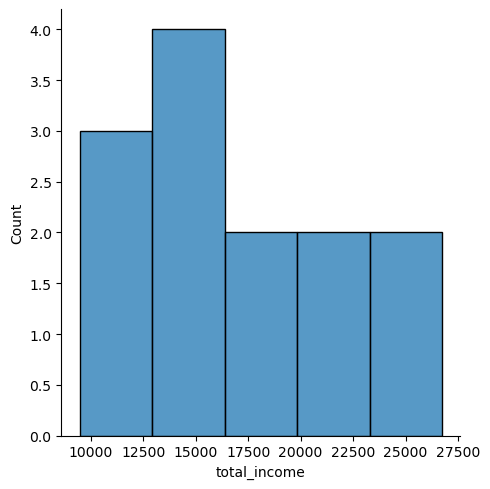

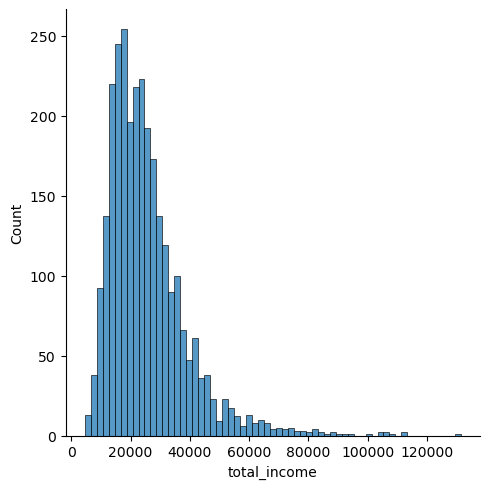

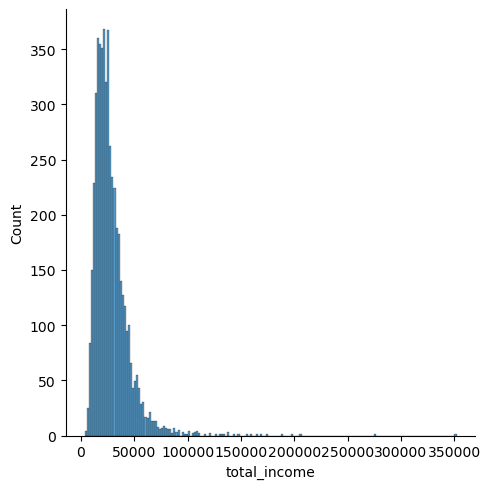

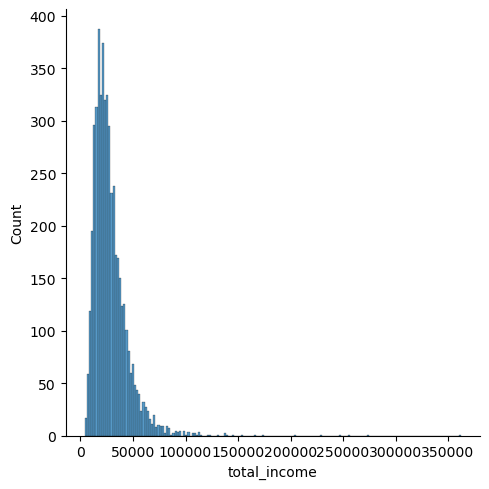

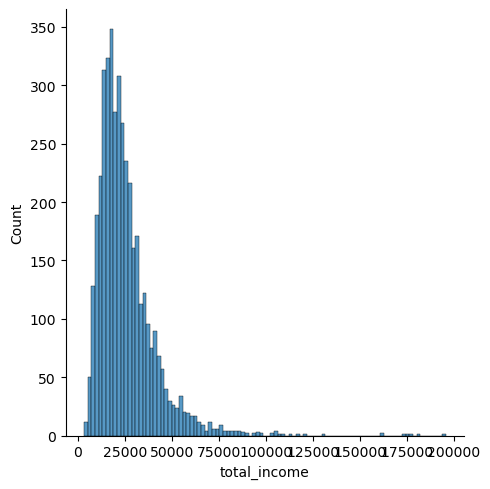

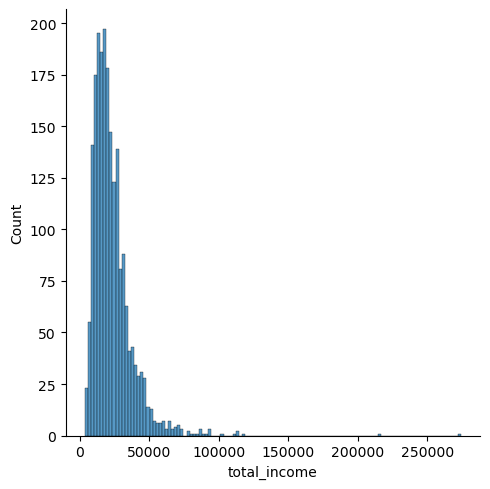

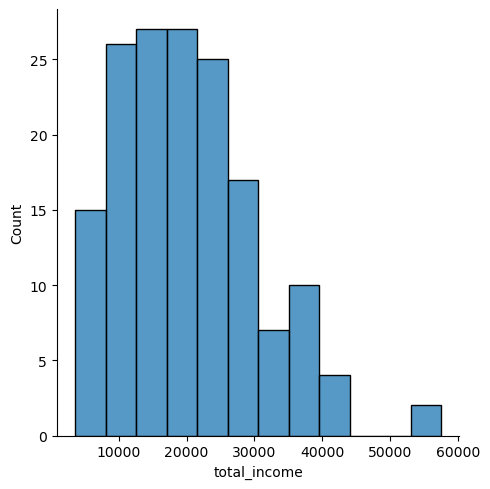

In [73]:
import seaborn as sns
sns.displot(df_notnull[df_notnull['age_group']=='10-19']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='20-29']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='30-39']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='40-49']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='50-59']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='60-69']['total_income'])
sns.displot(df_notnull[df_notnull['age_group']=='70+']['total_income'])

[Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini]

<font color='blue'>
I will use the median value to fill in the missing values in the 'total_income' column because I observe a tapering graph on the right side.
</font>


In [74]:
#  Write a function that we will use to fill in the missing values.
median_1019=df_notnull[df_notnull['age_group']=='10-19']['total_income'].median()
median_2029=df_notnull[df_notnull['age_group']=='20-29']['total_income'].median()
median_3039=df_notnull[df_notnull['age_group']=='30-39']['total_income'].median()
median_4049=df_notnull[df_notnull['age_group']=='40-49']['total_income'].median()
median_5059=df_notnull[df_notnull['age_group']=='50-59']['total_income'].median()
median_6069=df_notnull[df_notnull['age_group']=='60-69']['total_income'].median()
median_70=df_notnull[df_notnull['age_group']=='70+']['total_income'].median()

def fill_missing_total_income(row):
    age_group = row['age_group']
    total_income = row['total_income']
    
    if pd.isnull(total_income):
        if age_group == '10-19':
            return median_1019
        elif age_group == '20-29':
            return median_2029
        elif age_group == '30-39':
            return median_3039
        elif age_group == '40-49':
            return median_4049
        elif age_group == '50-59':
            return median_5059
        elif age_group == '60-69':
            return median_6069
        else:
            return median_70
    else:
        return total_income

In [75]:
# Check the values in the new column
df[(df['total_income'].isnull()) & (df['age_group'].notnull())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,60-69
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,40-49
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,60-69
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,50-59
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car,40-49
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,50-59
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property,40-49
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,40-49


In [76]:
# Apply the function to each row
df['total_income'] = df.apply(fill_missing_total_income, axis=1)

In [77]:
Check the number of entries in the column
df.info()

SyntaxError: invalid syntax (2321528783.py, line 1)

###  Fix the values in 'days_employed'

In [ ]:
# Median distribution of 'days_employed' based on the identified parameter
df_notnull.groupby('income_type')['days_employed'].median()

In [ ]:
# Average distribution of 'days_employed' based on the identified parameter
df_notnull.groupby('income_type')['days_employed'].mean()

In [ ]:
sns.displot(df_notnull[df_notnull['income_type']=='employee']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='business']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='retiree']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='civil servant']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='unemployed']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='student']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='entrepreneur']['days_employed'])
sns.displot(df_notnull[df_notnull['income_type']=='paternity / maternity leave']['days_employed'])

<font color='blue'>
I will use the median value to fill in the missing values in the 'days_employed' column because I see a tapering graph on the right side and there are some columns that only have 1 or 2 rows.
</font>

In [ ]:
# Write a function that calculates the mean or median (depending on your decision) based on the identified parameter.
def calculate_median(df, parameter, value, method='median'):
    if method == 'median':
        result = df[df[parameter] == value]['days_employed'].median()
    else:
        print('Invalid method.')
        return None
    return result

In [ ]:
# Check if the function can work
calculate_median(df_notnull,'income_type','employee','median')

In [ ]:
# Apply the function to 'income_type'
median_employee = calculate_median(df_notnull,'income_type','employee','median')
median_business = calculate_median(df_notnull,'income_type','business','median')
median_retiree = calculate_median(df_notnull,'income_type','retiree','median')
median_civil_servant = calculate_median(df_notnull,'income_type','civil servant','median')
median_unemployed = calculate_median(df_notnull,'income_type','unemployed','median')
median_student = calculate_median(df_notnull,'income_type','student','median')
median_entrepreneur = calculate_median(df_notnull,'income_type','entrepreneur','median')
median_paternity_maternity_leave = calculate_median(df_notnull,'income_type','paternity / maternity leave','median')

In [ ]:
# Check if the function can work
print(median_employee)
print(median_business)
print(median_retiree)
print(median_civil_servant)
print(median_unemployed)
print(median_student)
print(median_entrepreneur)
print(median_paternity_maternity_leave)

In [ ]:
# Replace the missing values

def fill_missing_days_employed(row):
    income_type = row['income_type']
    days_employed = row['days_employed']
    
    if pd.isnull(days_employed):
        if income_type == 'employee':
            return median_employee
        elif income_type == 'business':
            return median_business
        elif income_type == 'retiree':
            return median_retiree
        elif income_type == 'civil servant':
            return median_civil_servant
        elif income_type == 'unemployed':
            return median_unemployed
        elif income_type == 'student':
            return median_student
        elif income_type == 'entrepreneur':
            return median_entrepreneur
        else:
            return median_paternity_maternity_leave
    else:
        return days_employed

df['days_employed'] = df.apply(fill_missing_days_employed, axis=1)

In [ ]:
# Check the entries in all columns - make sure we have fixed all missing values
df.info()

## Data Categorization


In [ ]:
# Display the selected data values for categorization
df['purpose']

In [ ]:
# Check the unique values
print(df['purpose'].unique())

<font color='blue'>
    
The main groups from the unique values are:   
1. Property
2. Car
3. Education
4. Wedding

</font>

In [ ]:
# Write a function to categorize data based on common topics
def purpose_category(purpose):
    
    purpose_str = str(purpose)
    
    if 'property' in purpose_str or 'real estate' in purpose_str or 'hous' in purpose_str:
        return 'property'
    elif 'car' in purpose_str:
        return 'car'
    elif 'edu' in purpose_str or 'university' in purpose_str:
        return 'education'
    else:
        return 'wedding'

In [ ]:
# Create a column that contains the categories and calculate the values
df['purpose_category']=df['purpose'].apply(purpose_category)
df

In [ ]:
# Inspect all the numeric data in the chosen column for categorization
df['total_income']

In [ ]:
# Obtain statistical conclusions for the column
df['total_income'].describe()

In [ ]:
# Write a function that categorizes into different numerical groups based on ranges
def income_category(total_income):
    if total_income < 10000:
        return 'Very Low'
    elif total_income < 20000:
        return 'Low'
    elif total_income < 30000:
        return 'Medium'
    elif total_income < 40000:
        return 'High'
    else:
        return 'Very High'  

In [ ]:
# Create a column that contains the categories
df['income_category'] = df['total_income'].apply(income_category)
df

In [ ]:
# Calculate the count for each category to see their distribution
df['income_category'].value_counts()

## Hypothesis Testing

**Is there a correlation between having children and the probability of loan default?**

In [ ]:
# Check the children and loan default data
print(df.groupby('debt')['children'].value_counts(normalize=False))
print()
# Hitung persentase gagal bayar berdasarkan jumlah anak
print(df[df['debt']==1]['children'].value_counts(normalize=True).apply(lambda value: f"{value:.1%}"))

**Conclusion**

<font color='blue'>
Based on the analysis results, it can be seen that individuals without children have the highest loan default percentage at 61.1%, followed by individuals with 1 child at 25.6%, and individuals with 2 children at 11.6%. On the other hand, individuals with 3 children have a loan default percentage of 1.6%, and individuals with 4 children have a loan default percentage of 0.2%. Therefore, it can be concluded that there is no strong correlation between having children and the probability of loan default.
</font>

**Is there a correlation between family status and the probability of loan default?**

In [ ]:
# Check the family status and loan default data
print(df.groupby('debt')['family_status'].value_counts(normalize=False))
print()

# Calculate the loan default percentage based on family status
print(df[df['debt']==1]['family_status'].value_counts(normalize=True).apply(lambda value: f"{value:.1%}"))


**Conclusion**

<font color='blue'>
Based on the analysis results, it can be seen that the "married" family status category has the highest loan default percentage at 53.5%, followed by "civil partnership" at 22.3%, "unmarried" at 15.7%, "divorced" at 4.9%, and "widow/widower" at 3.6%. Therefore, it can be concluded that there is a correlation between family status (married or single) and the probability of loan default.
</font>

**Is there a correlation between income level and the probability of loan default?**

In [ ]:
# Check the income level data and loan default data
print(df.groupby('debt')['income_category'].value_counts(normalize=False))
print()

# Calculate the default rate based on income level
print(df[df['debt']==1]['income_category'].value_counts(normalize=True).apply(lambda value: f"{value:.1%}"))

**Conclusion**

<font color='blue'>
Based on the analysis results, it can be seen that the "Medium" income level category has the highest loan default percentage at 39.2%, followed by "Low" at 32.4%, "High" at 13.9%, "Very High" at 11.1%, and "Very Low" at 3.3%. There is a correlation starting from Low to Very High, but not with Medium and Very Low. There is a possibility that the Very Low income category has too few data and could potentially be merged with the Low income category.
</font>

**How does the loan purpose affect the default rate?**

In [ ]:
# Check the default rate for each loan purpose and analyze
print(df.groupby('debt')['purpose_category'].value_counts(normalize=False))
print()
print(df[df['debt']==1]['purpose_category'].value_counts(normalize=True).apply(lambda value: f"{value:.1%}"))

**Conclusion**

<font color='blue'>
From the analysis, it can be observed that the loan purpose of "property" has the highest default rate at 44.9%. This is followed by "car" at 23.1%, "education" at 21.3%, and "wedding" at 10.7%. This may be due to the loan amount, where larger loans have a higher probability of default.
</font>

# General Conclusion

<b></b>

<font color='blue'>
    
Based on the conducted analysis, several important conclusions can be drawn:

1. There are some missing values in certain columns, where 'days_employed' and 'total_income' have missing values. To fill in the missing values, the median of the respective columns is used.
    
2. There are some duplicate data, amounting to 71 data points. The duplicate data is removed to prevent unwanted influence on the analysis.

3. Hypothesis Testing 1: There is no correlation between having children and the probability of loan default. The more children an individual has, the lower the probability of loan default.

4. Hypothesis Testing 2: There is a correlation between family/marital status and the probability of loan default. Married individuals have a higher likelihood of loan default compared to unmarried or divorced individuals.

5. Hypothesis Testing 3: There is a correlation between income level and the probability of loan default, ranging from Low to Very High, but not for Medium and Very Low. There is a possibility that the Very Low income category has too few data and could potentially be merged with the Low income category.

6. Hypothesis Testing 4: There is a correlation between loan purpose and the probability of loan default. Individuals who take larger loans (for property purchase) have a higher probability of default compared to those who take smaller loans (for other purposes such as car, education, or wedding).

Based on these conclusions, it is suggested to pay more attention to borrower criteria such as family/marital status and loan purpose to minimize the risk of loan default.
</font>
